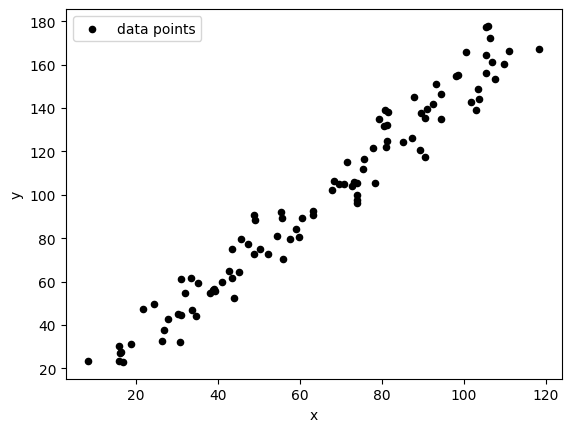

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

x_var = []
y_var = []

for k in range(1, 100):
    x = k+15
    x_var.append(x + np.random.normal(loc=0.0, scale = 4.0))
    y_var.append(x*1.5 + np.random.normal(loc=0.0, scale = 6.0))

regr_data = pd.DataFrame(list(zip(x_var, y_var)), columns = ["x", "y"])
regr_data.plot(x='x', y='y', kind='scatter', color='black', label='data points')
plt.legend(loc='upper left')
plt.show()

In [13]:
# data frames have to be converted to numpy arrays to work with sklearn.  Sklearn is not fully adapted to Pandas can using DFs directly can cause errors
x = regr_data.iloc[:, 0].values.reshape(-1, 1)
y = regr_data.iloc[:, 1].values.reshape(-1, 1)
# the shape of the numpy array is a 99 row, 1 column array
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


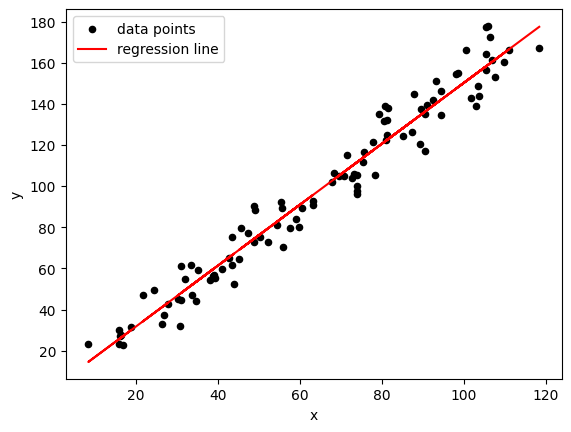

[1.99848787]
[[1.48231249]]


In [14]:
#scikit learn regression object
regr = linear_model.LinearRegression()
regr.fit(x, y)
regr_data['y_pred'] = regr.predict(x)

ax = regr_data.plot(x='x', y='y', kind='scatter', color='black', label='data points')
regr_data.plot(x='x', y='y_pred', kind='line', color='red', label='regression line', ax=ax)
plt.legend(loc='upper left')
plt.show()

print(regr.intercept_)
print(regr.coef_)

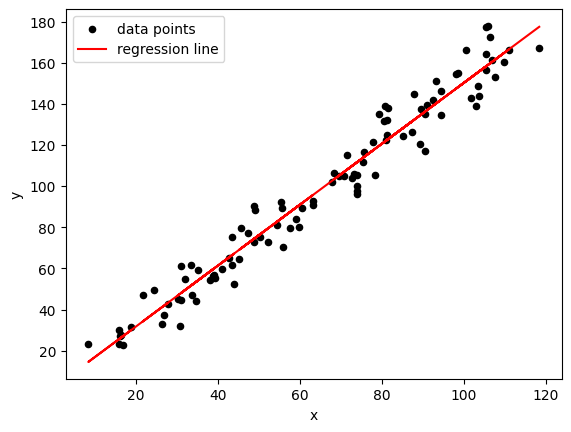

Intercept    1.998488
x            1.482312
dtype: float64


In [16]:
#stats model library.  OLS standard for ordinary least squares
regr_model = smf.ols(formula = 'y ~ x', data = regr_data).fit()
regr_data['y_pred2'] = regr_model.predict()

ax = regr_data.plot(x='x', y='y', kind='scatter', color='black', label='data points')
regr_data.plot(x='x', y='y_pred2', kind='line', color='red', label='regression line', ax=ax)
plt.legend(loc='upper left')
plt.show()

print(regr_model.params)